My Title

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
index = ['sales','returns','credit fees','rebates','late charges','shipping']
data = {'amount': [350000,-30000,-7500,-25000,95000,-7000]}
trans = pd.DataFrame(data=data,index=index)

In [8]:
from IPython.display import display
display(trans)


,amount
sales,350000
returns,-30000
credit fees,-7500
rebates,-25000
late charges,95000
shipping,-7000


In [9]:
display(trans.amount.cumsum())

sales           350000
returns         320000
credit fees     312500
rebates         287500
late charges    382500
shipping        375500
Name: amount, dtype: int64

In [10]:
blank=trans.amount.cumsum().shift(1).fillna(0)
display(blank)

sales                0.0
returns         350000.0
credit fees     320000.0
rebates         312500.0
late charges    287500.0
shipping        382500.0
Name: amount, dtype: float64

In [11]:
total = trans.sum().amount
trans.loc["net"] = total
blank.loc["net"] = total
display(trans)
display(blank)

,amount
sales,350000
returns,-30000
credit fees,-7500
rebates,-25000
late charges,95000
shipping,-7000
net,375500


sales                0.0
returns         350000.0
credit fees     320000.0
rebates         312500.0
late charges    287500.0
shipping        382500.0
net             375500.0
Name: amount, dtype: float64

In [12]:
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan
display(step)

0         0.0
0         NaN
0    350000.0
1    350000.0
1         NaN
1    320000.0
2    320000.0
2         NaN
2    312500.0
3    312500.0
3         NaN
3    287500.0
4    287500.0
4         NaN
4    382500.0
5    382500.0
5         NaN
5    375500.0
6    375500.0
6         NaN
6         NaN
Name: amount, dtype: float64

In [13]:
blank.loc["net"] = 0

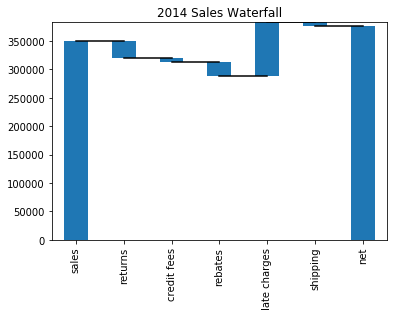

In [14]:
my_plot = trans.plot(kind='bar', stacked=True, bottom=blank,legend=None, title="2014 Sales Waterfall")
my_plot.plot(step.index, step.values,'k')

In [15]:
def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)

In [16]:
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(money)

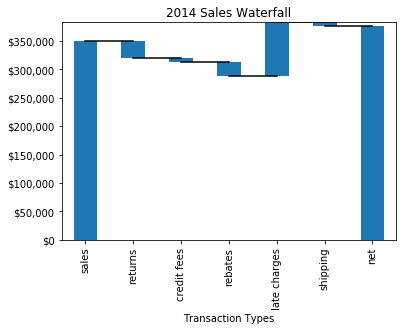

In [17]:
my_plot = trans.plot(kind='bar', stacked=True, bottom=blank,legend=None, title="2014 Sales Waterfall")
my_plot.plot(step.index, step.values,'k')
my_plot.set_xlabel("Transaction Types")
my_plot.yaxis.set_major_formatter(formatter)